In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv("city_day.csv")

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.shape

(29531, 16)

In [5]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
new = enc.fit_transform(df[['City']])
df[enc.categories_[0]] = new.toarray()

In [7]:
df.drop(['City', 'Date', 'AQI_Bucket'], axis=1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
np.set_printoptions(suppress=True)
imputed_data = imputer.fit_transform(df)
imputed_data[0][:13]

c:\Python 311\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array([ 45.45912582,  81.76964842,   0.92      ,  18.22      ,
        17.15      ,   9.69826182,   0.92      ,  27.64      ,
       133.36      ,   0.        ,   0.02      ,   0.        ,
       207.63599594])

In [9]:
df = pd.DataFrame(imputed_data, columns=df.columns)
df.isna().sum()

PM2.5                 0
PM10                  0
NO                    0
NO2                   0
NOx                   0
NH3                   0
CO                    0
SO2                   0
O3                    0
Benzene               0
Toluene               0
Xylene                0
AQI                   0
Ahmedabad             0
Aizawl                0
Amaravati             0
Amritsar              0
Bengaluru             0
Bhopal                0
Brajrajnagar          0
Chandigarh            0
Chennai               0
Coimbatore            0
Delhi                 0
Ernakulam             0
Gurugram              0
Guwahati              0
Hyderabad             0
Jaipur                0
Jorapokhar            0
Kochi                 0
Kolkata               0
Lucknow               0
Mumbai                0
Patna                 0
Shillong              0
Talcher               0
Thiruvananthapuram    0
Visakhapatnam         0
dtype: int64

<Axes: >

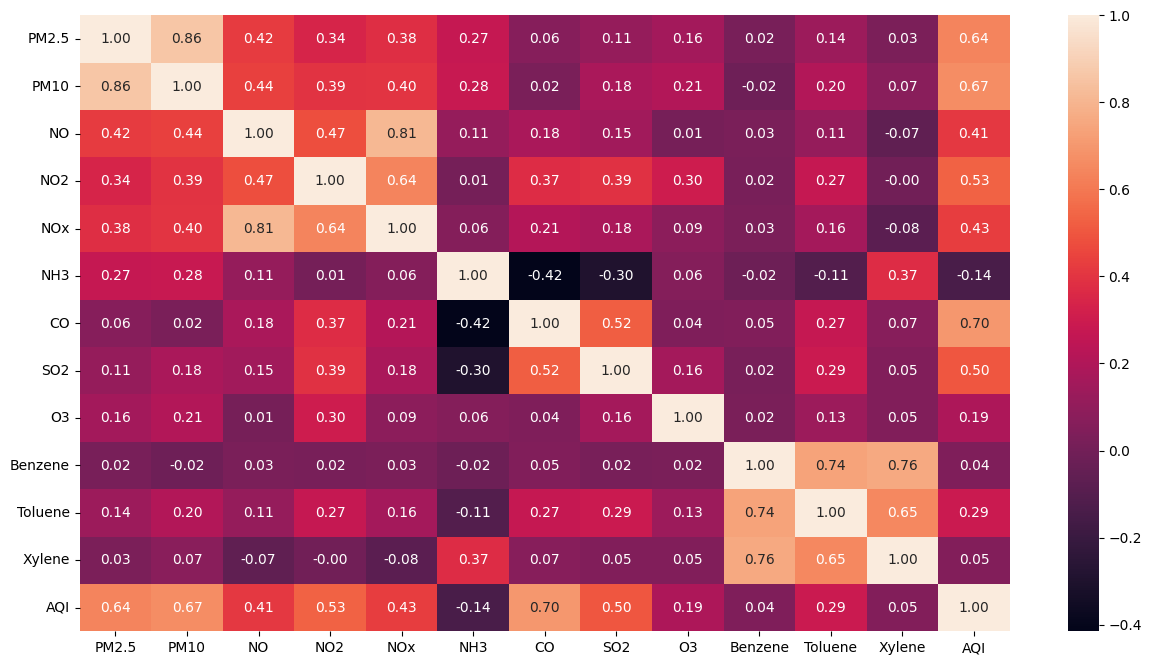

In [10]:
df1 = pd.DataFrame(df, columns=df.columns[:13])
plt.figure(figsize=(15, 8))
sns.heatmap(df1.corr(), annot=True, fmt='.2f')

<Axes: >

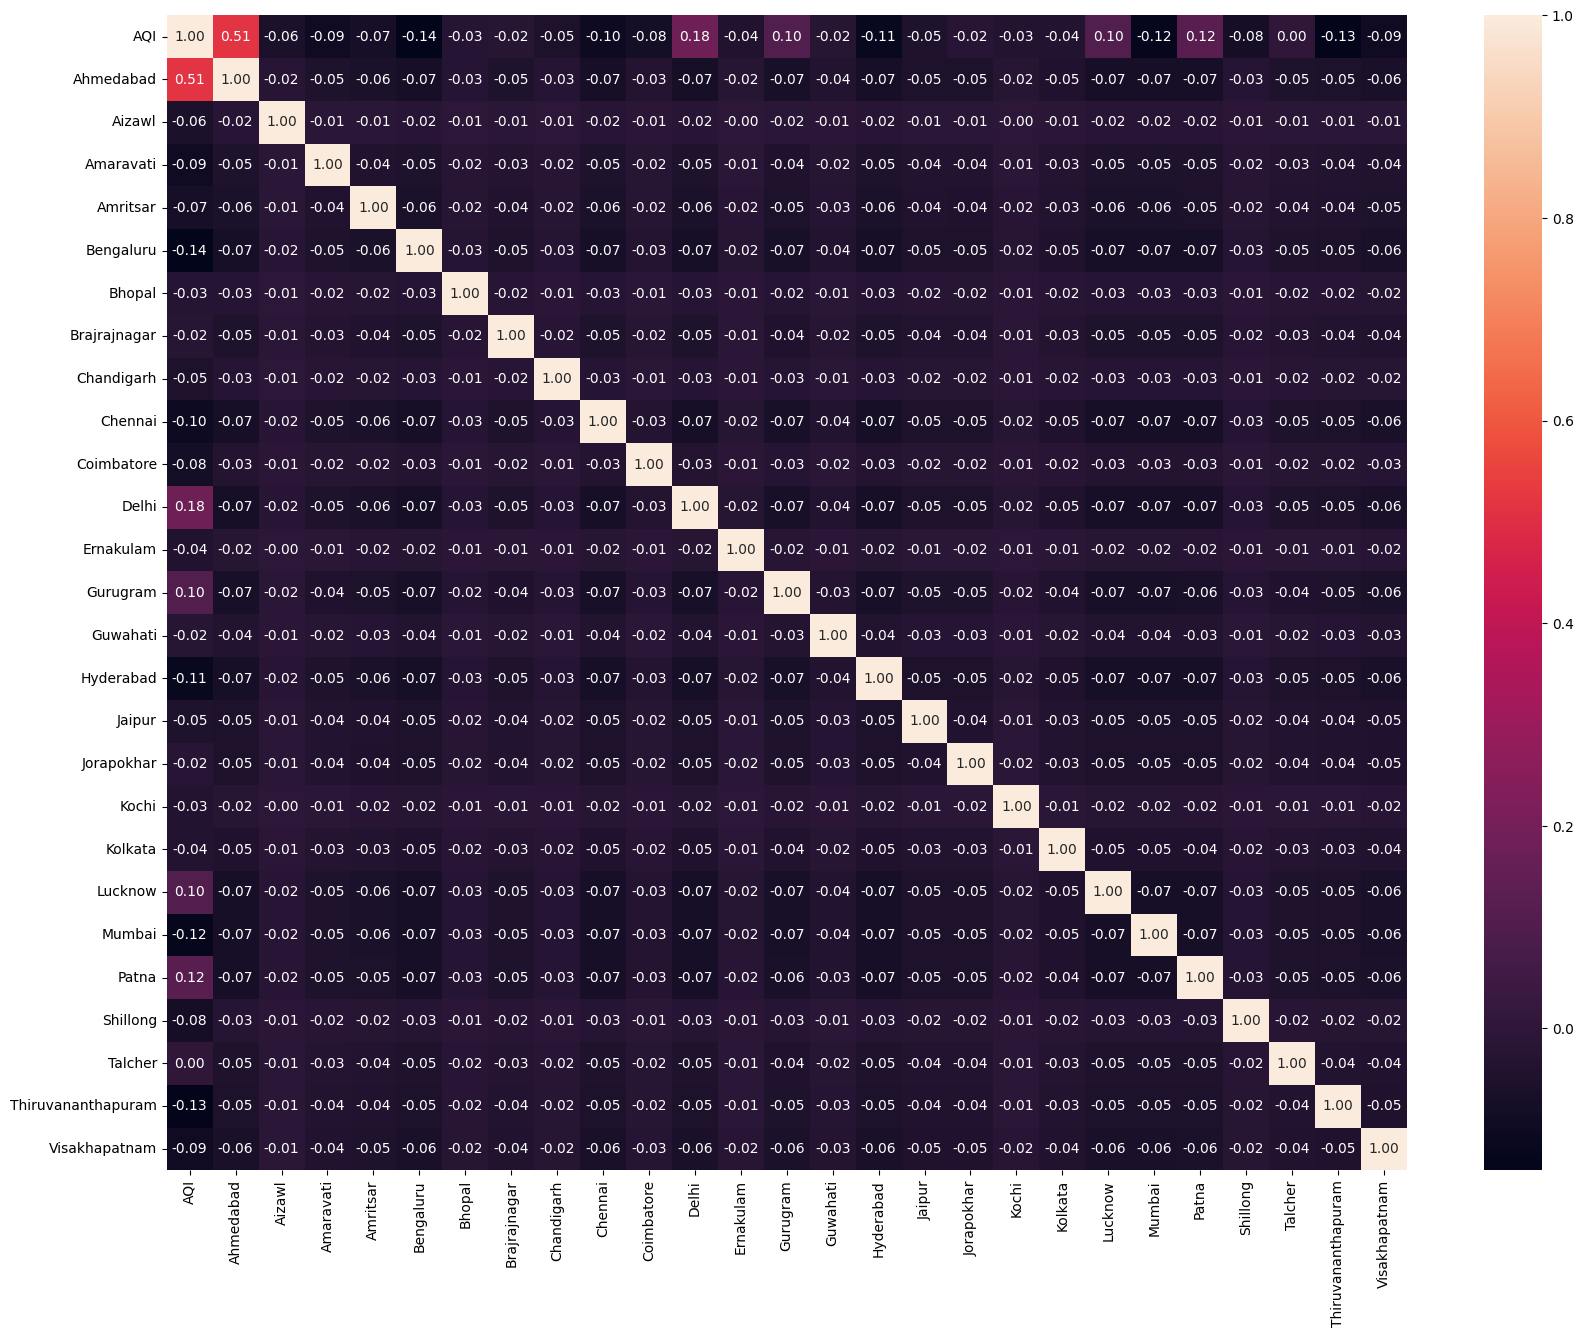

In [11]:
df1 = pd.DataFrame(df, columns=df.columns[12:])
plt.figure(figsize=(20, 15))
sns.heatmap(df1.corr(), annot=True, fmt='.2f')

In [12]:
X = df.drop(['AQI'], axis=1)
y = df['AQI']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin_train_start_time = time.time()
lin.fit(X_train, y_train)
lin_train_end_time = time.time()
lin_training_time = '{:.2f}'.format(lin_train_end_time - lin_train_start_time)

lin_pred = lin.predict(X_test)
lin_r2_train = '{:.3f}'.format(lin.score(X_train, y_train))
lin_r2_test = '{:.3f}'.format(r2_score(y_test, lin_pred))
lin_mse = '{:.2f}'.format(mean_squared_error(y_test, lin_pred))
lin_rmse = '{:.2f}'.format(mean_squared_error(y_test, lin_pred, squared=False))
lin_mae = '{:.2f}'.format(mean_absolute_error(y_test, lin_pred))
lin_accuracy = '{:.2f}'.format(r2_score(y_test, lin_pred) * 100)

print('Linear Regression:')
print(f'Training time: {lin_training_time}s')
print(f'R2_train: {lin_r2_train}')
print(f'R2_test: {lin_r2_test}')
print(f'MSE: {lin_mse}')
print(f'RMSE: {lin_rmse}')
print(f'MAE: {lin_mae}')
print(f'Accuracy: {lin_accuracy} %')

Linear Regression:
Training time: 0.03s
R2_train: 0.941
R2_test: 0.942
MSE: 1084.38
RMSE: 32.93
MAE: 18.79
Accuracy: 94.16 %


In [15]:
from sklearn import tree
dt = tree.DecisionTreeRegressor(max_depth=20, min_samples_leaf=4)

dt_train_start_time = time.time()
dt.fit(X_train, y_train)
dt_train_end_time = time.time()
dt_training_time = '{:.2f}'.format(dt_train_end_time - dt_train_start_time)

dt_pred = dt.predict(X_test)
dt_r2_train = '{:.3f}'.format(dt.score(X_train, y_train))
dt_r2_test = '{:.3f}'.format(r2_score(y_test, dt_pred))
dt_mse = '{:.2f}'.format(mean_squared_error(y_test, dt_pred))
dt_rmse = '{:.2f}'.format(mean_squared_error(y_test, dt_pred, squared=False))
dt_mae = '{:.2f}'.format(mean_absolute_error(y_test, dt_pred))
dt_accuracy = '{:.2f}'.format(r2_score(y_test, dt_pred) * 100)

print('Decision Tree Regressor:')
print(f'Training time: {dt_training_time}s')
print(f'R2_train: {dt_r2_train}')
print(f'R2_test: {dt_r2_test}')
print(f'MSE: {dt_mse}')
print(f'RMSE: {dt_rmse}')
print(f'MAE: {dt_mae}')
print(f'Accuracy: {dt_accuracy} %')

Decision Tree Regressor:
Training time: 0.79s
R2_train: 0.981
R2_test: 0.932
MSE: 1256.83
RMSE: 35.45
MAE: 19.45
Accuracy: 93.23 %


In [16]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(learning_rate=0.1, n_estimators=400, max_bin=150, num_leaves=50)

lgbm_train_start_time = time.time()
lgbm.fit(X_train, y_train)
lgbm_train_end_time = time.time()
lgbm_training_time = '{:.2f}'.format(lgbm_train_end_time - lgbm_train_start_time)

lgbm_pred = lgbm.predict(X_test)
lgbm_r2_train = '{:.3f}'.format(lgbm.score(X_train, y_train))
lgbm_r2_test = '{:.3f}'.format(r2_score(y_test, lgbm_pred))
lgbm_mse = '{:.2f}'.format(mean_squared_error(y_test, lgbm_pred))
lgbm_rmse = '{:.2f}'.format(mean_squared_error(y_test, lgbm_pred, squared=False))
lgbm_mae = '{:.2f}'.format(mean_absolute_error(y_test, lgbm_pred))
lgbm_accuracy = '{:.2f}'.format(r2_score(y_test, lgbm_pred) * 100)

print('LGBM Regressor:')
print(f'Training time: {lgbm_training_time}s')
print(f'R2_train: {lgbm_r2_train}')
print(f'R2_test: {lgbm_r2_test}')
print(f'MSE: {lgbm_mse}')
print(f'RMSE: {lgbm_rmse}')
print(f'MAE: {lgbm_mae}')
print(f'Accuracy: {lgbm_accuracy} %')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1852
[LightGBM] [Info] Number of data points in the train set: 20671, number of used features: 38
[LightGBM] [Info] Start training from score 167.547906
LGBM Regressor:
Training time: 0.99s
R2_train: 0.993
R2_test: 0.965
MSE: 652.04
RMSE: 25.54
MAE: 13.29
Accuracy: 96.49 %


In [17]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=2000, learning_rate=0.11, subsample=0.8)

xgb_train_start_time = time.time()
xgb.fit(X_train, y_train)
xgb_train_end_time = time.time()
xgb_training_time = '{:.2f}'.format(xgb_train_end_time - xgb_train_start_time)

xgb_pred = xgb.predict(X_test)
xgb_r2_train = '{:.3f}'.format(xgb.score(X_train, y_train))
xgb_r2_test = '{:.3f}'.format(r2_score(y_test, xgb_pred))
xgb_mse = '{:.2f}'.format(mean_squared_error(y_test, xgb_pred))
xgb_rmse = '{:.2f}'.format(mean_squared_error(y_test, xgb_pred, squared=False))
xgb_mae = '{:.2f}'.format(mean_absolute_error(y_test, xgb_pred))
xgb_accuracy = '{:.2f}'.format(r2_score(y_test, xgb_pred) * 100)

print('XGB Regressor:')
print(f'Training time: {xgb_training_time}s')
print(f'R2_train: {xgb_r2_train}')
print(f'R2_test: {xgb_r2_test}')
print(f'MSE: {xgb_mse}')
print(f'RMSE: {xgb_rmse}')
print(f'MAE: {xgb_mae}')
print(f'Accuracy: {xgb_accuracy} %')

XGB Regressor:
Training time: 45.94s
R2_train: 1.000
R2_test: 0.970
MSE: 550.55
RMSE: 23.46
MAE: 12.34
Accuracy: 97.03 %


In [18]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')

knn_train_start_time = time.time()
knn.fit(X_train, y_train)
knn_train_end_time = time.time()
knn_training_time = '{:.2f}'.format(knn_train_end_time - knn_train_start_time)

knn_pred = knn.predict(X_test)
knn_r2_train = '{:.3f}'.format(knn.score(X_train, y_train))
knn_r2_test = '{:.3f}'.format(r2_score(y_test, knn_pred))
knn_mse = '{:.2f}'.format(mean_squared_error(y_test, knn_pred))
knn_rmse = '{:.2f}'.format(mean_squared_error(y_test, knn_pred, squared=False))
knn_mae = '{:.2f}'.format(mean_absolute_error(y_test, knn_pred))
knn_accuracy = '{:.2f}'.format(r2_score(y_test, knn_pred) * 100)

print('KNeighbors Regressor:')
print(f'Training time: {knn_training_time}s')
print(f'R2_train: {knn_r2_train}')
print(f'R2_test: {knn_r2_test}')
print(f'MSE: {knn_mse}')
print(f'RMSE: {knn_rmse}')
print(f'MAE: {knn_mae}')
print(f'Accuracy: {knn_accuracy} %')

KNeighbors Regressor:
Training time: 0.01s
R2_train: 1.000
R2_test: 0.935
MSE: 1199.70
RMSE: 34.64
MAE: 17.79
Accuracy: 93.54 %


In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=4)

rf_train_start_time = time.time()
rf.fit(X_train, y_train)
rf_train_end_time = time.time()
rf_training_time = '{:.2f}'.format(rf_train_end_time - rf_train_start_time)

rf_pred = rf.predict(X_test)
rf_r2_train = '{:.3f}'.format(rf.score(X_train, y_train))
rf_r2_test = '{:.3f}'.format(r2_score(y_test, rf_pred))
rf_mse = '{:.2f}'.format(mean_squared_error(y_test, rf_pred))
rf_rmse = '{:.2f}'.format(mean_squared_error(y_test, rf_pred, squared=False))
rf_mae = '{:.2f}'.format(mean_absolute_error(y_test, rf_pred))
rf_accuracy = '{:.2f}'.format(r2_score(y_test, rf_pred) * 100)

print('Random Forest Regressor:')
print(f'Training time: {rf_training_time}s')
print(f'R2_train: {rf_r2_train}')
print(f'R2_test: {rf_r2_test}')
print(f'MSE: {rf_mse}')
print(f'RMSE: {rf_rmse}')
print(f'MAE: {rf_mae}')
print(f'Accuracy: {rf_accuracy} %')

Random Forest Regressor:
Training time: 62.67s
R2_train: 0.982
R2_test: 0.956
MSE: 810.44
RMSE: 28.47
MAE: 14.72
Accuracy: 95.64 %


In [20]:
data = [['Linear Regression', lin_training_time, lin_r2_train, lin_r2_test, lin_mse, lin_rmse, lin_mae, lin_accuracy],
        ['Decision Tree Regressor', dt_training_time, dt_r2_train, dt_r2_test, dt_mse, dt_rmse, dt_mae, dt_accuracy],
        ['LGBM Regressor', lgbm_training_time, lgbm_r2_train, lgbm_r2_test, lgbm_mse, lgbm_rmse, lgbm_mae, lgbm_accuracy],
        ['XGB Regressor', xgb_training_time, xgb_r2_train, xgb_r2_test, xgb_mse, xgb_rmse, xgb_mae, xgb_accuracy],
        ['KNeighbors Regressor', knn_training_time, knn_r2_train, knn_r2_test, knn_mse, knn_rmse, knn_mae, knn_accuracy],
        ['Random Forest Regressor', rf_training_time, rf_r2_train, rf_r2_test, rf_mse, rf_rmse, rf_mae, rf_accuracy]]

col = ['Name', 'Training time (in s)', 'R2_train', 'R2_test', 'MSE', 'RMSE', 'MAE', 'Accuracy (in %)']
table = pd.DataFrame(data, columns=col)
table.sort_values('Accuracy (in %)', ascending=False, inplace=True)
table

,Name,Training time (in s),R2_train,R2_test,MSE,RMSE,MAE,Accuracy (in %)
3,XGB Regressor,45.94,1.000,0.970,550.55,23.46,12.34,97.03
2,LGBM Regressor,0.99,0.993,0.965,652.04,25.54,13.29,96.49
5,Random Forest Regressor,62.67,0.982,0.956,810.44,28.47,14.72,95.64
0,Linear Regression,0.03,0.941,0.942,1084.38,32.93,18.79,94.16
4,KNeighbors Regressor,0.01,1.000,0.935,1199.70,34.64,17.79,93.54
1,Decision Tree Regressor,0.79,0.981,0.932,1256.83,35.45,19.45,93.23


In [21]:
def predict_AQI(city, pm2_5, pm10, no, no2, nox, nh3, co, so2, o3, benzene, toluene, xylene):    
    city_index = np.where(X.columns==city)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = pm2_5
    x[1] = pm10
    x[2] = no
    x[3] = no2
    x[4] = nox
    x[5] = nh3
    x[6] = co
    x[7] = so2
    x[8] = o3
    x[9] = benzene
    x[10] = toluene
    x[11] = xylene

    x[city_index] = 1

    x_np = np.asarray(x)
    x_reshape = x_np.reshape(1, -1)
    pred = xgb.predict(x_reshape)
    pred = np.round(pred, 2)

    print('Air Quality Index:', pred[0], '-> ', end='')
    if (pred <= 50):
        print('GOOD')
    elif (pred <= 100):
        print('SATISFACTORY')
    elif (pred <= 200):
        print('MODERATE')
    elif (pred <= 300):
        print('POOR')
    elif (pred <= 400):
        print('VERY POOR')
    else:
        print('SEVERE')

In [22]:
predict_AQI('Ahmedabad', 45.45912582, 81.76964842, 0.92, 18.22, 17.15, 9.69826182, 0.92, 27.64, 133.36, 0, 0.02, 0)

Air Quality Index: 200.06 -> POOR


In [23]:
import pickle
pickle.dump(xgb, open('aqi.pkl', 'wb'))